In [1]:

import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction

#Sentence tokenization
from nltk.tokenize import sent_tokenize

#Word tokenization
from nltk.tokenize import TreebankWordTokenizer

#Stemming
from nltk.stem.lancaster import LancasterStemmer

In [2]:

# Imports
# Basics
from __future__ import print_function, division
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics.pairwise as smp

from sklearn.decomposition import NMF

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
dl_df = pd.read_csv('disneyland.csv')

In [4]:
dl_df.head()

,Unnamed: 0,dates,members,reviews,titles
0,0,Reviewed 2 days ago,"Kelsie GArmstrong, Canada10",This was my 5th time visiting Disneyland Park ...,My Favourite
1,1,Reviewed 2 days ago,"SightCeeROceanside, California5213",My family and I had an amazing time. It is rat...,Expensive but a bucket list check!
2,2,Reviewed 2 days ago,Janell G21,We had a great time here. The weather was cool...,We live Disneyland
3,3,Reviewed 3 days ago,"CanadianShanEdmonton, AB69","Castmembers are friendly and helpful, most of ...","Go early, prepare your wallet, amazing experience"
4,4,Reviewed 3 days ago,"D GSan Rafael, California189","Everything is top notch, fun as always. Tip fo...",Disney Does it Right!


In [5]:
dl_df.shape

(20390, 5)

In [6]:
dca_df = pd.read_csv('dca.csv')

In [7]:
dca_df

,Unnamed: 0,dates,members,reviews,titles
0,0,Reviewed 5 days ago,Heather B93,"There were scheduled ride closures, but while ...",So many closures
1,1,Reviewed 5 days ago,"jmegg3Omaha, Nebraska3526",We visited the park two days ago and to be hon...,Not what we expected
2,2,Reviewed 5 days ago,"daveb186London, Ontario, Canada7918","We had a great time, don’t miss the nighttime ...","Excellent, even with some construction going on."
3,3,Reviewed 5 days ago,"Dawn HPotters Bar, United Kingdom63",We visited Disney California Adventure park la...,CARS LAND...WOW
4,4,Reviewed 6 days ago,"Kris BVancouver Island, Canada12",I really loved Disneyland California Adventure...,Loved Disneyland California Adventure Park
5,5,Reviewed 6 days ago,"Tara HVacaville, California14927",I could not stop taking pictures. My husband a...,My favorite part of both parks. I could have s...
6,6,Reviewed 1 week ago,"youngSaudiTravellerCardiff, United Kingdom18698",We couldn't go on all the rides as some were c...,Enjoyed
7,7,Reviewed 1 week ago,"HughlongdenTaupo, New Zealand81",Took my mum for her 50th and we both absolutel...,Worth every minute of the long plane ride
8,8,Reviewed 1 week ago,truekiwiNewZealandNew Zealand6133,We enjoyed a much better day at this park than...,Better than Disneyland!!
9,9,Reviewed 1 week ago,Canada3219624,It was surprising and disappointing that so ma...,So much closed down


In [8]:
dca_df.shape

(10990, 5)

### Combining Disneyland and DCA Reviews into a List

Disneyland Reviews

In [9]:
dl_reviews = list(dl_df['reviews'])

In [10]:
dl_reviews

["This was my 5th time visiting Disneyland Park in Anaheim. It's my favourite over Disneyworld in Florida because everything is so close. You can walk basically anywhere saving you time and money. I can't wait to come back many more times!",
 'My family and I had an amazing time. It is rather expensive but it is a must. You forget the $ stacking up when you see your kids smiling. Get fast passes but be mindful you can only ride it once on them per ride. Spend a little more and get the hopper pass, too much to see in one day.',
 'We had a great time here. The weather was cool and lines weren’t too long. It’s a great time to come and visit.',
 'Castmembers are friendly and helpful, most of the rides are interesting and fun but food and merchandise is very expensive. I advise going at park opening or earlier as security and main gates while take at least 20 mins. By mid afternoon it’s literally a sea of people, shoulder to shoulder so it can be tough to get around and most rides have 30 m

In [11]:
dca_reviews = list(dca_df['reviews'])

In [12]:
dca_reviews

['There were scheduled ride closures, but while there, we experienced rice malfunctions on 3 separate rides and the Frozen show was cancelled unexpectedly. With our fastpass sitting all day to get on the cars ride in the late afternoon, we spent a lot of time in lines. After so many issues, I ended up counceling my 8 year old on how we need to just roll with things out of our control. However, since we paid over $400 for the day for our family, the number of these issues was really frustrating. I expect better from Disney. My kids wanted to go back to Disneyland and leave CA adventure. Soarin was definitely a highlight of the day and worth the hour + wait.',
 'We visited the park two days ago and to be honest, we were very disappointed! This review is being made by three adults who went to the park instead of having kids with us so I know that could make a difference with this particular park. However, that being said, I have been to Disneyworld one time without kids and it is great fu

In [13]:
#Sentence tokenization
reviews = []
for review in dl_reviews:
    reviews.append(review)

In [14]:
reviews

["This was my 5th time visiting Disneyland Park in Anaheim. It's my favourite over Disneyworld in Florida because everything is so close. You can walk basically anywhere saving you time and money. I can't wait to come back many more times!",
 'My family and I had an amazing time. It is rather expensive but it is a must. You forget the $ stacking up when you see your kids smiling. Get fast passes but be mindful you can only ride it once on them per ride. Spend a little more and get the hopper pass, too much to see in one day.',
 'We had a great time here. The weather was cool and lines weren’t too long. It’s a great time to come and visit.',
 'Castmembers are friendly and helpful, most of the rides are interesting and fun but food and merchandise is very expensive. I advise going at park opening or earlier as security and main gates while take at least 20 mins. By mid afternoon it’s literally a sea of people, shoulder to shoulder so it can be tough to get around and most rides have 30 m

In [15]:
len(reviews)

20390

In [16]:
for review in dca_reviews:
    reviews.append(review)

In [17]:
len(reviews)

31380

In [18]:
len(set(reviews))

29621

In [19]:
#Create a list without duplicates
unique_reviews = list(set(reviews))


# TFIDF

In [20]:
tfidf = TfidfVectorizer(stop_words="english", 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", #words with >= 2 alpha chars 
                        ngram_range=(2,4),
                        min_df=10)
tfidf_vecs = tfidf.fit_transform(unique_reviews)
pd.DataFrame(tfidf_vecs.todense(), 
             columns=tfidf.get_feature_names()
            ).head()

,able advantage,able afford,able attractions,able bodied,able bring,able california,able catch,able characters,able come,able day,...,youngest son,yr old,yr old daughter,yr old son,yr olds,yrs ago,yrs old,yummy food,zone tower,zone tower terror
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LSI

In [21]:
# Convert sparse matrix of counts to a gensim corpus
# Need to transpose it for gensim which wants 
# terms by docs instead of docs by terms
tfidf_corpus = matutils.Sparse2Corpus(tfidf_vecs.transpose())

# Row indices
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

# This is a hack for Python 3!
id2word = corpora.Dictionary.from_corpus(tfidf_corpus, 
                                         id2word=id2word)

2018-03-09 08:23:31,384 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-03-09 08:23:31,569 : INFO : adding document #10000 to Dictionary(0 unique tokens: [])
2018-03-09 08:23:31,761 : INFO : adding document #20000 to Dictionary(0 unique tokens: [])
2018-03-09 08:23:32,027 : INFO : built Dictionary(19444 unique tokens: ['disneyland lived', 'truly happiest', 'happiest place', 'place earth', 'experience life']...) from 29621 documents (total 120174 corpus positions)


In [37]:

# Build an LSI space from the input TFIDF matrix, mapping of row id to word, and num_topics
# num_topics is the number of dimensions to reduce to after the SVD
# Analagous to "fit" in sklearn, it primes an LSI space
lsi = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=10)

2018-03-09 00:32:52,710 : INFO : using serial LSI version on this node
2018-03-09 00:32:52,711 : INFO : updating model with new documents
2018-03-09 00:32:52,822 : INFO : preparing a new chunk of documents
2018-03-09 00:32:52,980 : INFO : using 100 extra samples and 2 power iterations
2018-03-09 00:32:52,983 : INFO : 1st phase: constructing (19444, 110) action matrix
2018-03-09 00:32:53,161 : INFO : orthonormalizing (19444, 110) action matrix
2018-03-09 00:32:53,746 : INFO : 2nd phase: running dense svd on (110, 20000) matrix
2018-03-09 00:32:54,112 : INFO : computing the final decomposition
2018-03-09 00:32:54,114 : INFO : keeping 10 factors (discarding 73.485% of energy spectrum)
2018-03-09 00:32:54,123 : INFO : processed documents up to #20000
2018-03-09 00:32:54,129 : INFO : topic #0(9.745): 0.318*"california adventure" + 0.264*"fast pass" + 0.256*"place earth" + 0.249*"happiest place" + 0.244*"happiest place earth" + 0.141*"fast passes" + 0.140*"radiator springs" + 0.137*"adventur

In [38]:

# Retrieve vectors for the original tfidf corpus in the LSI space ("transform" in sklearn)
lsi_corpus = lsi[tfidf_corpus]

# Dump the resulting document vectors into a list so we can take a look
doc_vecs = [doc for doc in lsi_corpus]
doc_vecs[0]

[(0, 0.005373210165026062),
 (1, 0.00233429422627093),
 (2, 0.0007608639572703011),
 (3, -0.002621531396440029),
 (4, 2.9376397085156516e-05),
 (5, 0.0013508560005697575),
 (6, 0.004059798989385863),
 (7, -0.0017255100883991376),
 (8, 0.0012655317066066628),
 (9, 0.0014605894414301147)]

__Adjust num_features later__

In [39]:
# Create an index transformer that calculates similarity based on 
# our space
index = similarities.MatrixSimilarity(doc_vecs, 
                                      num_features=10)

# Return the sorted list of cosine similarities to the first document
sims = sorted(enumerate(index[doc_vecs[0]]), key=lambda item: -item[1])
sims

2018-03-09 00:32:55,835 : INFO : creating matrix with 29621 documents and 10 features


[(0, 1.0),
 (28910, 0.97826463),
 (16746, 0.97519773),
 (25362, 0.9746776),
 (20801, 0.9741549),
 (2902, 0.97400093),
 (1863, 0.9707064),
 (15190, 0.9705804),
 (2027, 0.9669893),
 (14006, 0.96646076),
 (29250, 0.96548456),
 (18663, 0.9642093),
 (27662, 0.9634244),
 (11340, 0.96283144),
 (19554, 0.9624255),
 (21010, 0.9615327),
 (4391, 0.96099716),
 (24434, 0.96084327),
 (13803, 0.9598163),
 (20796, 0.95971185),
 (25940, 0.9587137),
 (9641, 0.95863795),
 (18883, 0.9574943),
 (4325, 0.95747805),
 (14428, 0.9571645),
 (26559, 0.9571448),
 (558, 0.95663625),
 (14961, 0.95627654),
 (13889, 0.9561439),
 (13945, 0.95556664),
 (19185, 0.95531493),
 (1270, 0.95527184),
 (24157, 0.95497906),
 (13769, 0.95486295),
 (1076, 0.95442486),
 (8568, 0.954043),
 (2796, 0.95399845),
 (20964, 0.95398504),
 (27966, 0.9537408),
 (3561, 0.9524922),
 (6786, 0.95177704),
 (13013, 0.95154476),
 (4230, 0.9513762),
 (29604, 0.9512801),
 (20280, 0.95126325),
 (13828, 0.95124835),
 (15438, 0.95120823),
 (21721, 0.95

In [40]:
# Let's take a look at how we did
for sim_doc_id, sim_score in sims[0:3]: 
    print("Score: " + str(sim_score))
    print("Document: " + unique_reviews[sim_doc_id])

Score: 1.0
Document: If you stay for the evening lighted parade, then watch it from the circle near the park entrance. It gives you a quicker exit time through all the masses leaving after the parade.
Score: 0.97826463
Document: Our kids LOVE Dland, but over the years it's gotten so expensive! It's crazy that it costs several hundred dollars simply to go to an amusement park! Prices have increased but the rides haven't . In fact it actually seems like the roller coasters are often down when we go. Last time, Big Thunder was down the entire day. And Space Mtn had numerous times throughout the day been down. If they are going to continually increase admission prices, they ought to be giving more for the money. Value is diminishing. It is still the cleanest amusement park we've been to.
Score: 0.97519773
Document: For a family of four spending $800 for ONE DAY at a park, there should be a lot of rides to be experienced. Sadly, five rides in one day does not cut it. It was extremely disapp

In [41]:
disney_lsi = matutils.corpus2dense(lsi_corpus, num_terms=300).transpose()
disney_lsi.shape

(29621, 300)

In [22]:
#LSI for 5 topics

lsi2 = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=5)

2018-03-09 08:24:46,220 : INFO : using serial LSI version on this node
2018-03-09 08:24:46,222 : INFO : updating model with new documents
2018-03-09 08:24:46,592 : INFO : preparing a new chunk of documents
2018-03-09 08:24:46,730 : INFO : using 100 extra samples and 2 power iterations
2018-03-09 08:24:46,731 : INFO : 1st phase: constructing (19444, 105) action matrix
2018-03-09 08:24:46,881 : INFO : orthonormalizing (19444, 105) action matrix
2018-03-09 08:24:47,344 : INFO : 2nd phase: running dense svd on (105, 20000) matrix
2018-03-09 08:24:47,534 : INFO : computing the final decomposition
2018-03-09 08:24:47,537 : INFO : keeping 5 factors (discarding 81.527% of energy spectrum)
2018-03-09 08:24:47,544 : INFO : processed documents up to #20000
2018-03-09 08:24:47,551 : INFO : topic #0(9.755): -0.328*"california adventure" + -0.271*"fast pass" + -0.246*"place earth" + -0.241*"happiest place" + -0.233*"happiest place earth" + -0.142*"radiator springs" + -0.139*"fast passes" + -0.136*"a

In [23]:
lsi2.print_topics(num_words=20)

2018-03-09 08:25:53,649 : INFO : topic #0(11.833): 0.326*"california adventure" + 0.275*"fast pass" + 0.237*"place earth" + 0.230*"happiest place" + 0.225*"happiest place earth" + 0.146*"radiator springs" + 0.143*"adventure park" + 0.142*"cars land" + 0.139*"fast passes" + 0.127*"world color" + 0.126*"disney world" + 0.122*"california adventure park" + 0.118*"great time" + 0.100*"disney california" + 0.099*"year old" + 0.098*"park hopper" + 0.092*"tower terror" + 0.090*"disney california adventure" + 0.087*"disneyland california" + 0.085*"make sure"
2018-03-09 08:25:53,651 : INFO : topic #1(10.478): -0.508*"place earth" + -0.496*"happiest place" + -0.488*"happiest place earth" + 0.201*"california adventure" + 0.138*"fast pass" + 0.101*"radiator springs" + 0.098*"cars land" + 0.089*"adventure park" + 0.083*"world color" + 0.078*"california adventure park" + -0.076*"truly happiest place" + -0.075*"truly happiest" + -0.075*"truly happiest place earth" + -0.070*"disneyland happiest" + -0.0

[(0,
  '0.326*"california adventure" + 0.275*"fast pass" + 0.237*"place earth" + 0.230*"happiest place" + 0.225*"happiest place earth" + 0.146*"radiator springs" + 0.143*"adventure park" + 0.142*"cars land" + 0.139*"fast passes" + 0.127*"world color" + 0.126*"disney world" + 0.122*"california adventure park" + 0.118*"great time" + 0.100*"disney california" + 0.099*"year old" + 0.098*"park hopper" + 0.092*"tower terror" + 0.090*"disney california adventure" + 0.087*"disneyland california" + 0.085*"make sure"'),
 (1,
  '-0.508*"place earth" + -0.496*"happiest place" + -0.488*"happiest place earth" + 0.201*"california adventure" + 0.138*"fast pass" + 0.101*"radiator springs" + 0.098*"cars land" + 0.089*"adventure park" + 0.083*"world color" + 0.078*"california adventure park" + -0.076*"truly happiest place" + -0.075*"truly happiest" + -0.075*"truly happiest place earth" + -0.070*"disneyland happiest" + -0.070*"disneyland happiest place" + -0.070*"disneyland happiest place earth" + 0.065*"

# ~* CLUSTERING *~

## K-Means

In [33]:
from sklearn.cluster import KMeans


First, I need to see the appropriate number of clusters

In [37]:

from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(disney_lsi)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(disney_lsi, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 
    
    print(Sil_coefs)
    print(labels)

[0.53703165]
[0 0 0 ... 0 0 0]
[0.53703165, 0.36674774]
[1 1 1 ... 1 1 0]
[0.53703165, 0.36674774, 0.35702932]
[1 1 1 ... 1 1 3]
[0.53703165, 0.36674774, 0.35702932, 0.3941576]
[1 1 1 ... 1 4 0]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763]
[0 0 0 ... 0 5 3]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435]
[5 5 5 ... 5 2 4]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435, 0.43119234]
[2 2 2 ... 2 5 3]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435, 0.43119234, 0.44975117]
[1 1 1 ... 1 7 5]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435, 0.43119234, 0.44975117, 0.42344683]
[1 0 0 ... 0 7 3]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435, 0.43119234, 0.44975117, 0.42344683, 0.42486507]
[8 9 9 ... 6 4 5]
[0.53703165, 0.36674774, 0.35702932, 0.3941576, 0.39372763, 0.41900435, 0.43119234, 0.44975117, 0.42344683, 0.42486507, 0.4254662]
[10  9  9 ...  7  6  3]
[0

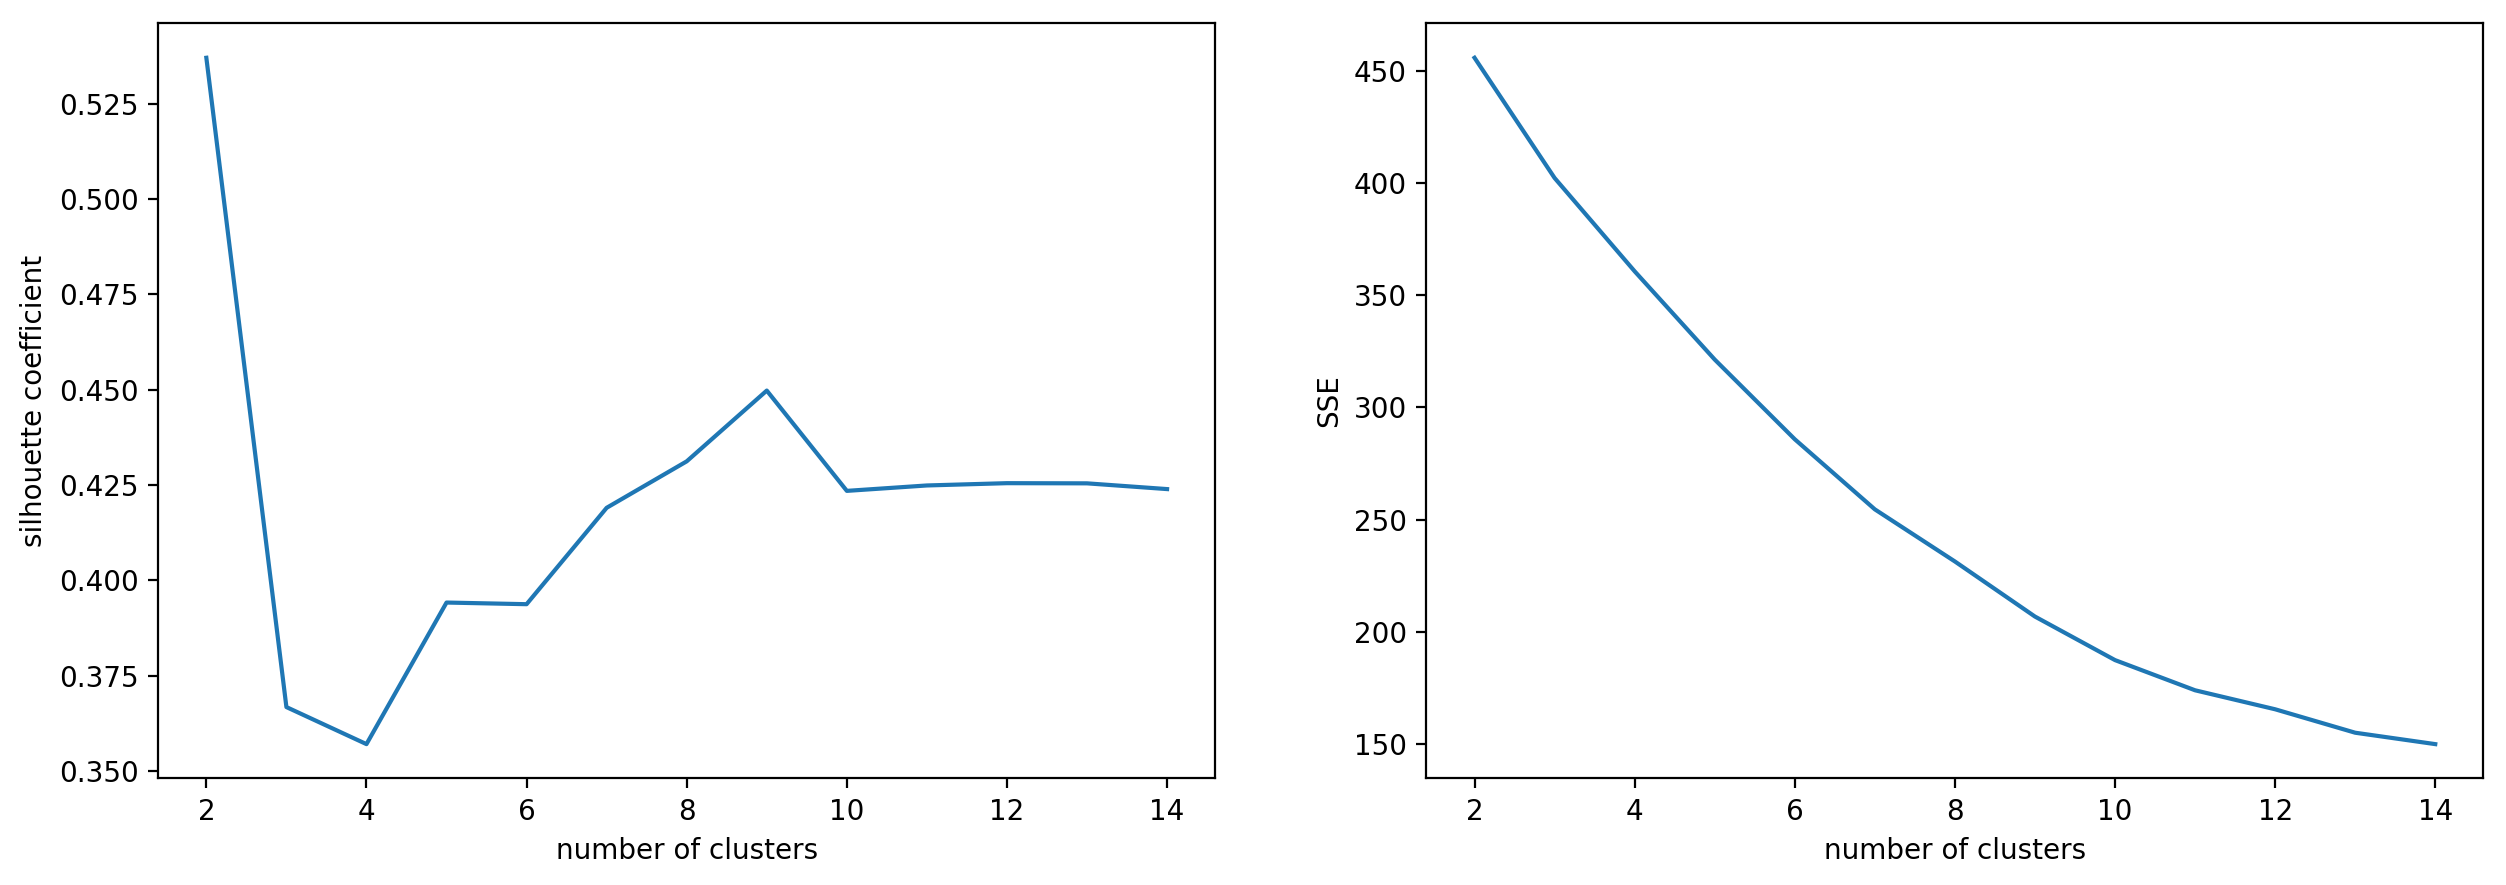

In [38]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,15)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

For n_clusters = 2 The average silhouette_score is : 0.53703165
For n_clusters = 3 The average silhouette_score is : 0.36674774
For n_clusters = 4 The average silhouette_score is : 0.35702932
For n_clusters = 5 The average silhouette_score is : 0.3941576
For n_clusters = 6 The average silhouette_score is : 0.39372763
For n_clusters = 7 The average silhouette_score is : 0.41900435
For n_clusters = 8 The average silhouette_score is : 0.43119234
For n_clusters = 9 The average silhouette_score is : 0.44975117
For n_clusters = 10 The average silhouette_score is : 0.42344683
For n_clusters = 11 The average silhouette_score is : 0.42486507
For n_clusters = 12 The average silhouette_score is : 0.4254662
For n_clusters = 13 The average silhouette_score is : 0.42542037
For n_clusters = 14 The average silhouette_score is : 0.4239143


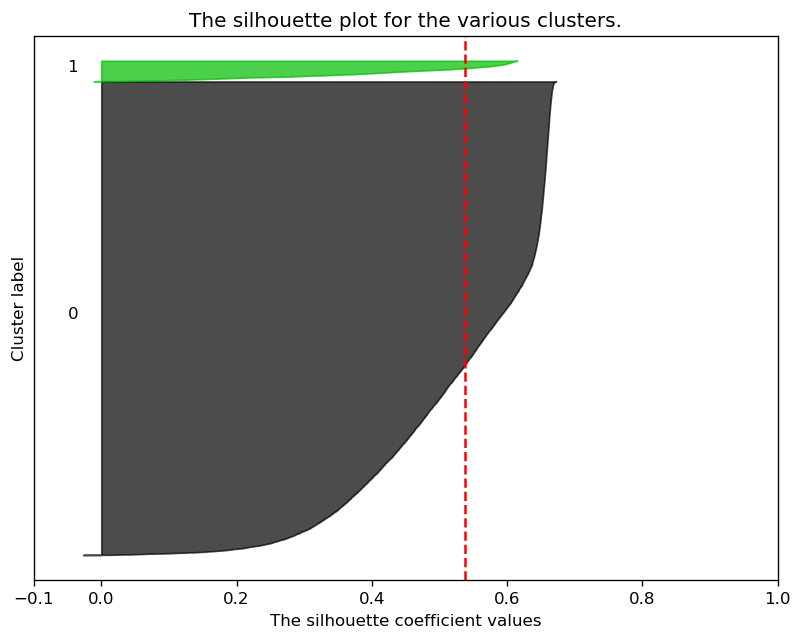

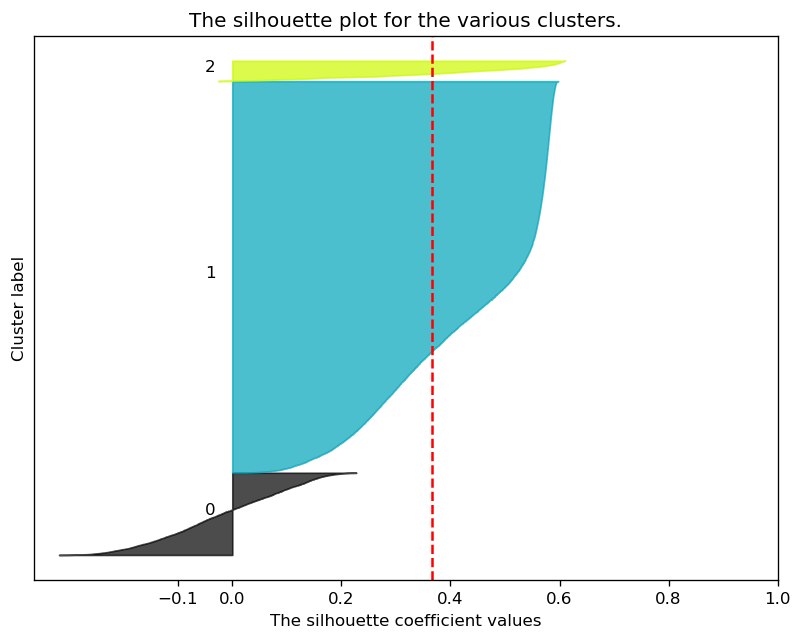

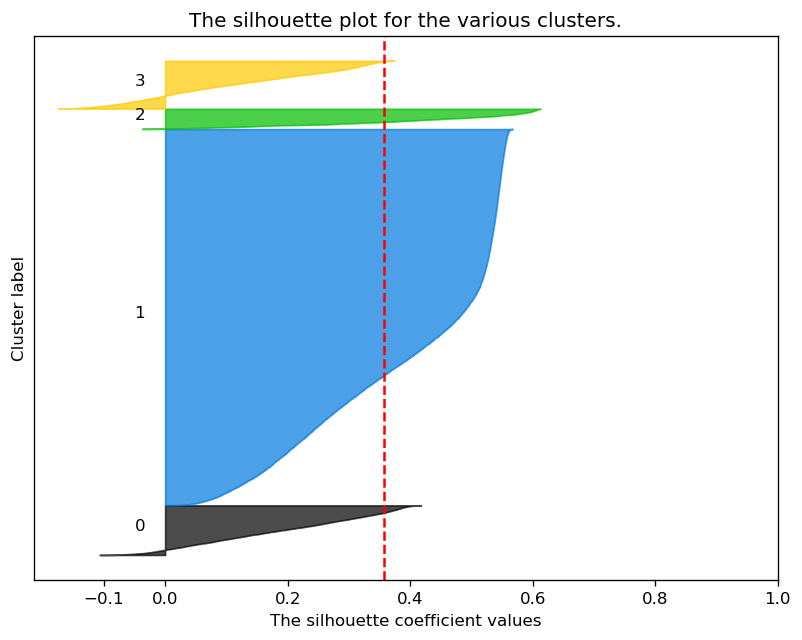

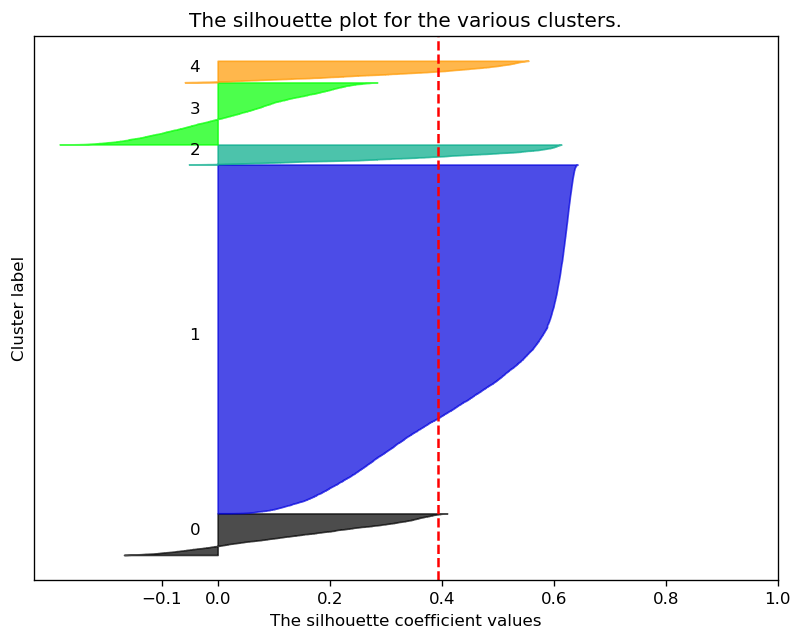

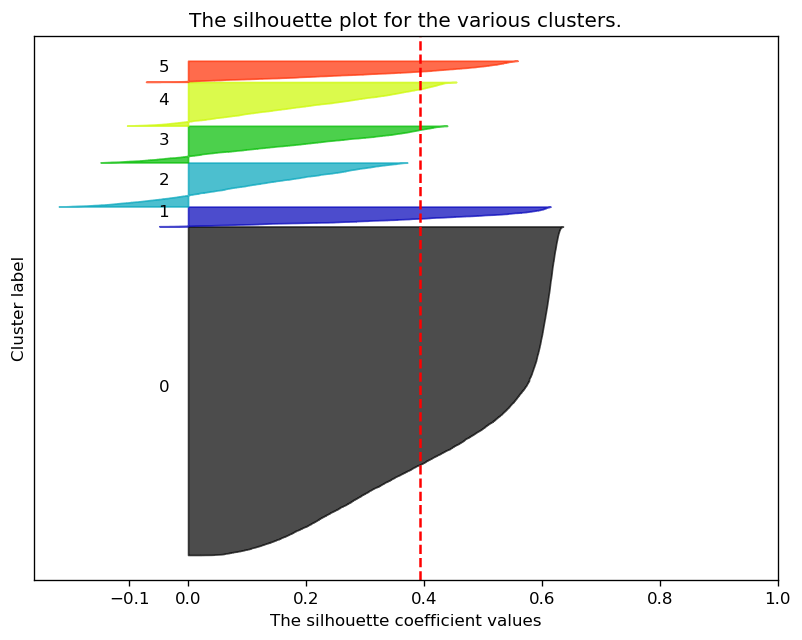

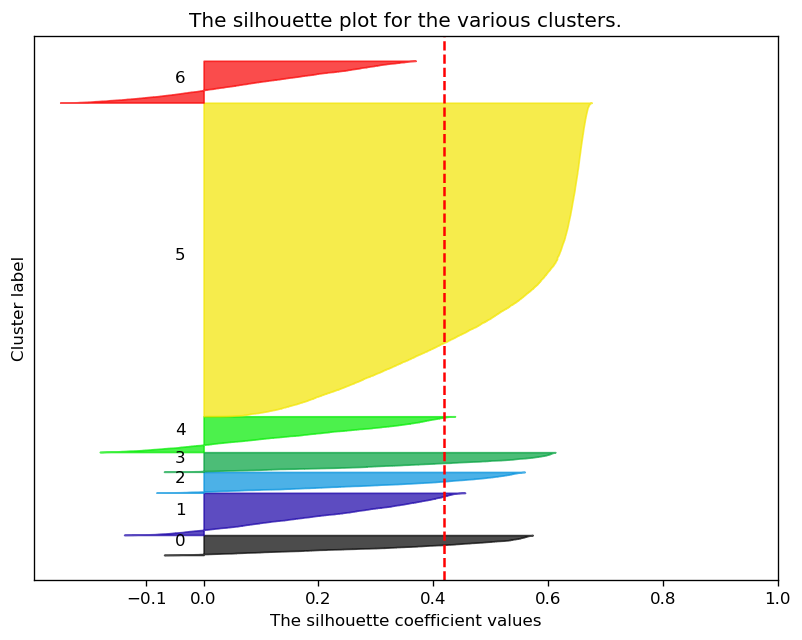

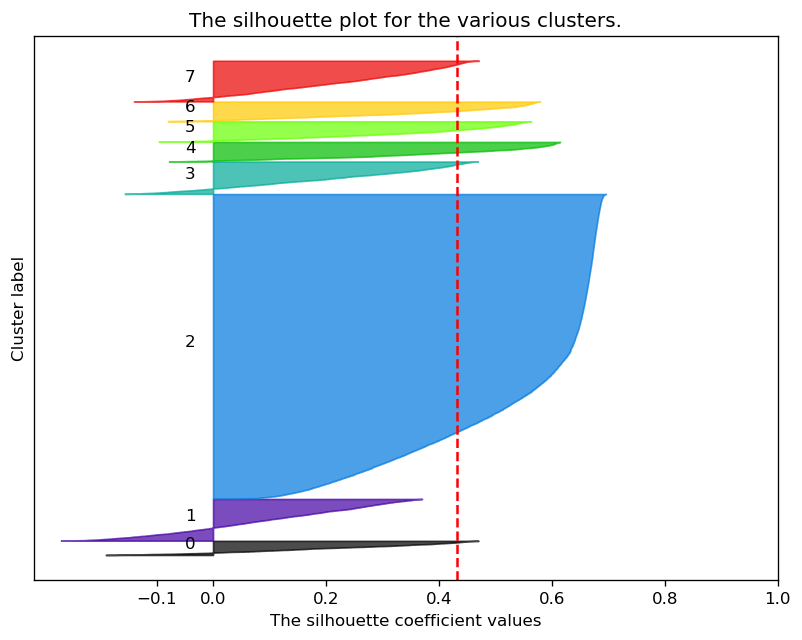

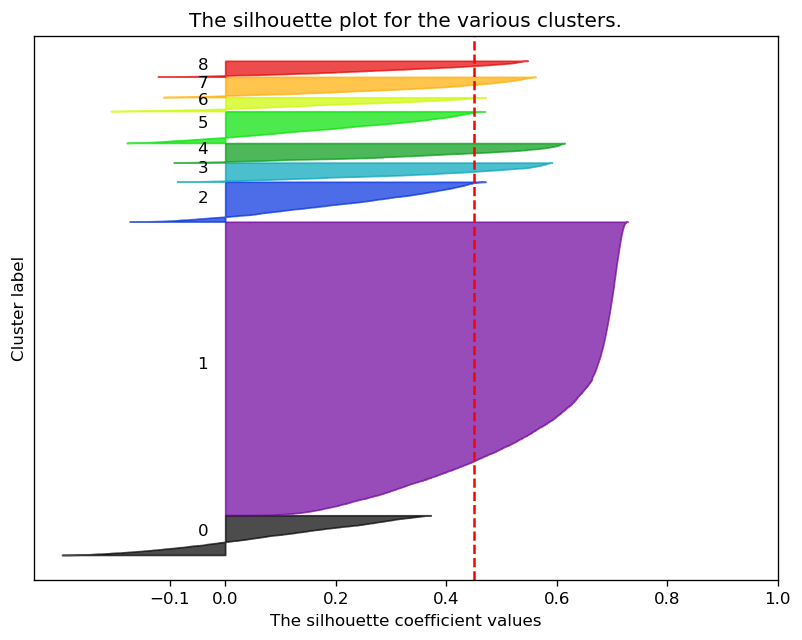

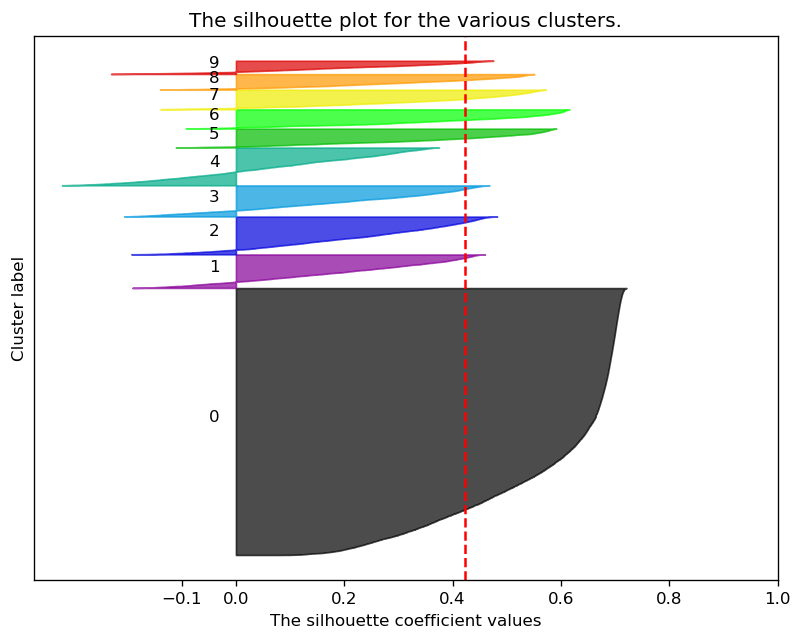

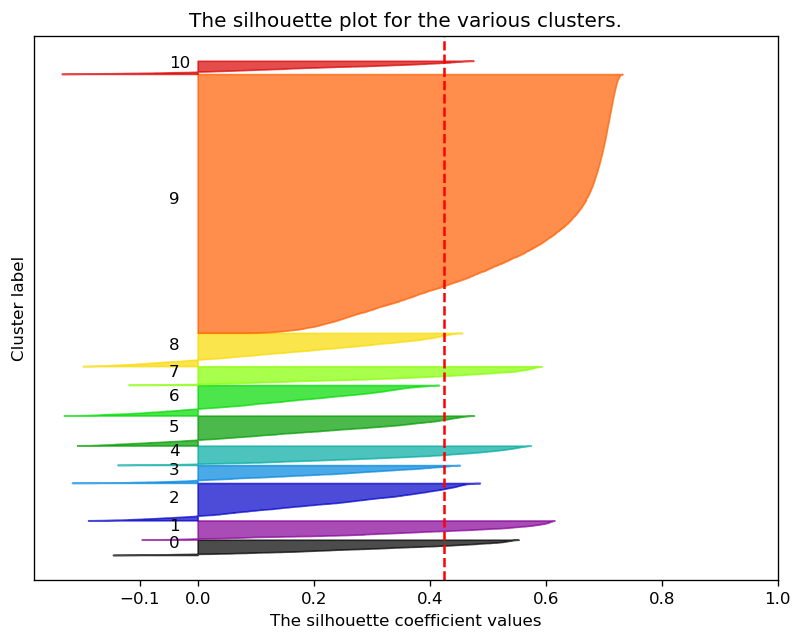

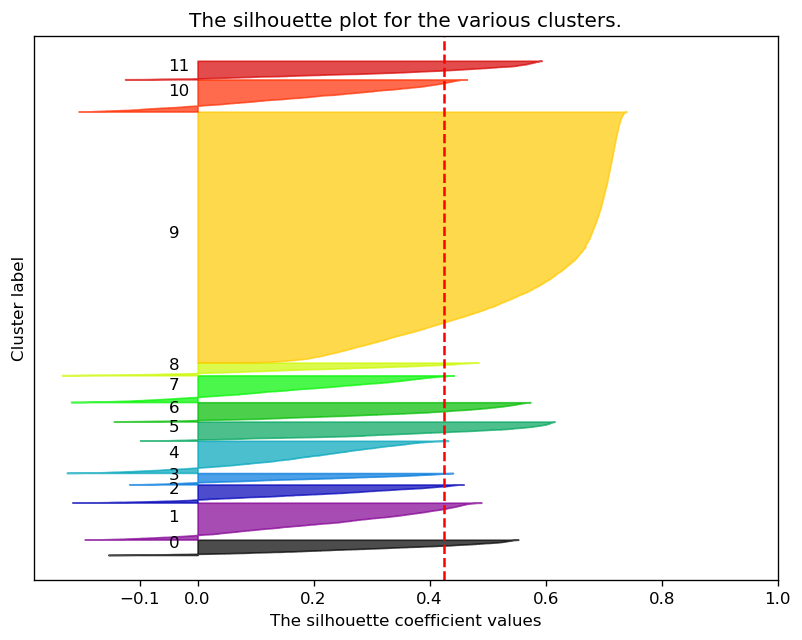

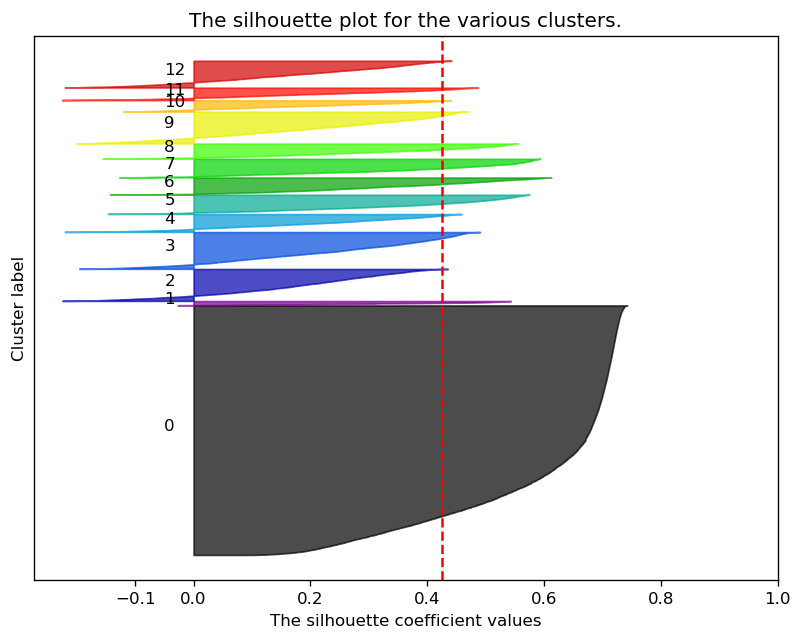

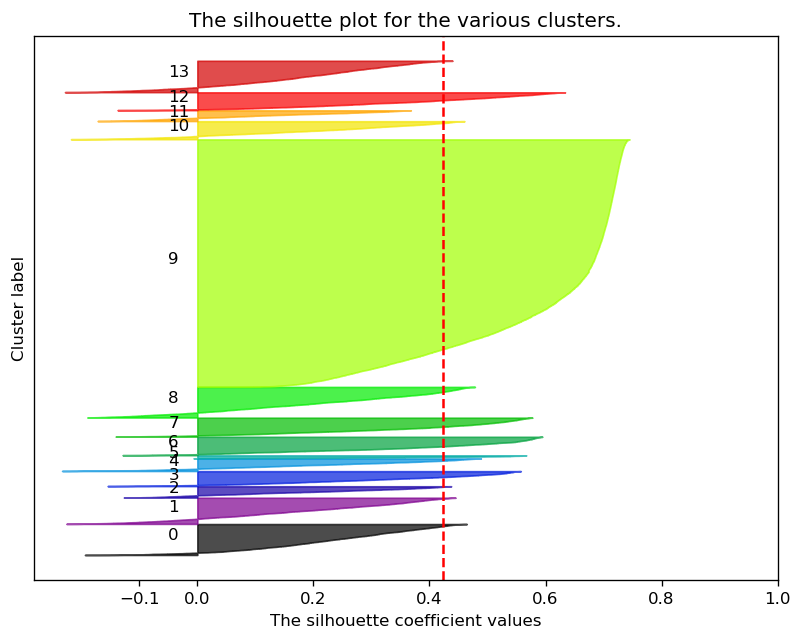

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

for k in range(2,15):
    plt.figure(dpi=120, figsize=(8,6))
    ax1 = plt.gca()
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(disney_lsi)
    labels = km.labels_
    silhouette_avg = silhouette_score(disney_lsi, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(disney_lsi, labels)
    y_lower = 100
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [42]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(disney_lsi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [44]:
clusters = km.predict(disney_lsi)

In [46]:
pd.DataFrame({'review': unique_reviews,
              'Cluster': clusters})

,Cluster,review
0,0,"If you stay for the evening lighted parade, th..."
1,1,"Took a while, but finally made it to Disneylan..."
2,0,There is something for everyone at Disneyland....
3,0,"When you go to Disney, you get the full Disney..."
4,0,What's not to love!!! Nothing like being a kid...
5,0,"Amazing, as always! The decor for Halloween wa..."
6,0,It's always great! Went in later than usual to...
7,0,"We had an amazing time here, Adults and childr..."
8,0,We had the most amazing time! The wait times w...
9,0,No one does it better than Disney! Outstanding...


In [50]:
km = KMeans(n_clusters=9, random_state=1)
km.fit(disney_lsi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [51]:
clusters = km.predict(disney_lsi)

In [52]:
pd.DataFrame({'review': unique_reviews,
              'Cluster': clusters})

,Cluster,review
0,1,"If you stay for the evening lighted parade, th..."
1,3,"Took a while, but finally made it to Disneylan..."
2,1,There is something for everyone at Disneyland....
3,0,"When you go to Disney, you get the full Disney..."
4,0,What's not to love!!! Nothing like being a kid...
5,1,"Amazing, as always! The decor for Halloween wa..."
6,1,It's always great! Went in later than usual to...
7,1,"We had an amazing time here, Adults and childr..."
8,6,We had the most amazing time! The wait times w...
9,1,No one does it better than Disney! Outstanding...
